# With/Without mask classification

### Task in hand
Help in classifing people with and without mask

## Let's get started

In [10]:
# import necessary libs
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.metrics import classification_report, confusion_matrix

#### Load the data

In [11]:
# dir variables
train_dir ="../input/withwithout-mask/maskdata/maskdata/train"
test_dir="../input/withwithout-mask/maskdata/maskdata/test"

In [12]:
# Generator
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(1.2, 1.5),
    validation_split=0.2
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)

In [13]:
train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True,
    seed = 42
)

val_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=True,
    seed = 42
)


test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 493 images belonging to 2 classes.
Found 123 images belonging to 2 classes.
Found 198 images belonging to 2 classes.


### Model Building

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(224,224,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()
# kernel_size = (3,3), fliter(64)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 186624)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                5972000   
_________________________________________________________________
dense_4 (Dense)              (None, 32)               

In [15]:
epochs=100

history = model.fit(
    train_data,
    validation_data = val_data,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
16/16 [==============================] - 4s 208ms/step - loss: 1.0374 - accuracy: 0.5217 - val_loss: 0.6647 - val_accuracy: 0.5528
Epoch 2/100
16/16 [==============================] - 3s 199ms/step - loss: 0.6482 - accuracy: 0.6695 - val_loss: 0.5195 - val_accuracy: 0.8130
Epoch 3/100
16/16 [==============================] - 3s 206ms/step - loss: 0.4867 - accuracy: 0.7682 - val_loss: 0.3141 - val_accuracy: 0.8943
Epoch 4/100
16/16 [==============================] - 3s 193ms/step - loss: 0.3195 - accuracy: 0.8853 - val_loss: 0.2737 - val_accuracy: 0.8943
Epoch 5/100
16/16 [==============================] - 3s 220ms/step - loss: 0.2047 - accuracy: 0.9124 - val_loss: 0.2456 - val_accuracy: 0.9187
Epoch 6/100
16/16 [==============================] - 3s 190ms/step - loss: 0.1526 - accuracy: 0.9531 - val_loss: 0.2312 - val_accuracy: 0.9268
Epoch 7/100
16/16 [==============================] - 3s 189ms/step - loss: 0.1121 - accuracy: 0.9612 - val_loss: 0.2346 - val_accuracy: 0.9187

### Model Evaluation

In [16]:
result = model.evaluate(test_data)
print(f'.Loss: {result[0]:.5f}')
print(f'..Acc: {result[1]:.3f}')

7/7 [==============================] - 1s 97ms/step - loss: 0.3484 - accuracy: 0.8737
.Loss: 0.34840
..Acc: 0.874


### Visualize Results

In [17]:
sample_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

sample_images = sample_generator.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42
)

Found 198 images belonging to 2 classes.


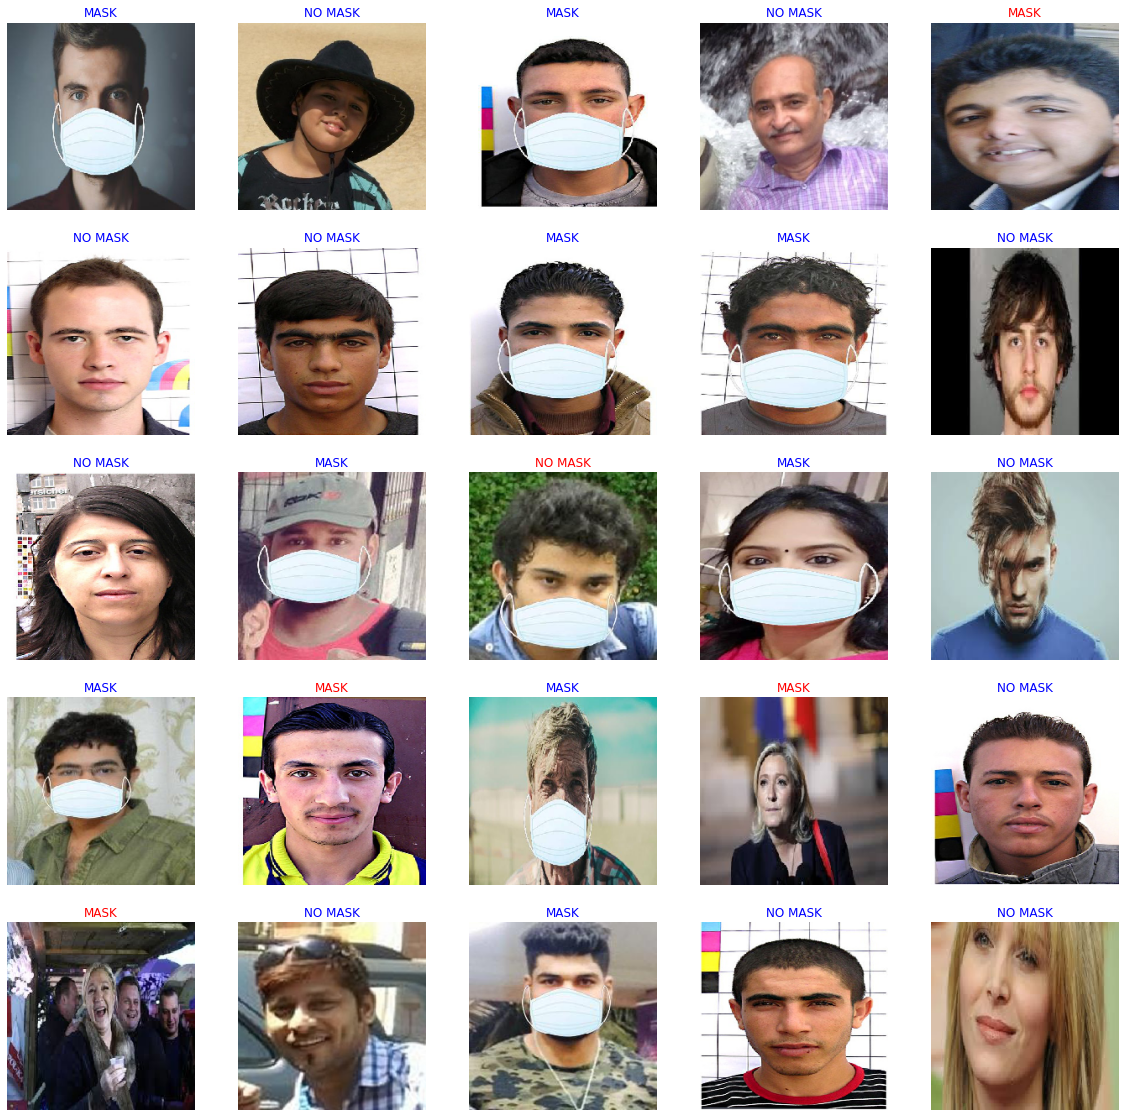

In [18]:
samples = sample_images.next()

predictions = np.squeeze(model.predict(samples[0]) >= 0.5).astype(np.int)
labels = samples[1].astype(np.int)

plt.figure(figsize=(20, 20))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(samples[0][i])
    plt.axis('off')
    plt.title(("NO MASK" if predictions[i] == 1 else "MASK"), color=('blue' if labels[i] == predictions[i] else 'red'))

plt.show()